In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [5]:
url = 'https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=3.5&page=1&locId=3941674&locType=C'
response = requests.get(url)
response.status_code ##: 403

403

In [19]:
import cloudscraper
url = 'https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=3.5&page=1&locId=3941674&locType=C'
scraper = cloudscraper.create_scraper()
res = scraper.get(url)
print(res.status_code)

200


<bound method Tag.prettify of <!DOCTYPE html>
<html>
<head>
<title>Security | Glassdoor</title>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="#0caa41" name="theme-color"/>
<style type="text/css">body,html{background:#fff;font-family:Helvetica Neue,HelveticaNeue,Helvetica,Arial,sans-serif;font-size:16px;margin:0;padding:0}div,h1,h2,h3,h4,h5,h6,p{color:#20262e}.header{-webkit-box-shadow:inset 0 -1px 0 0 #dee0e3;box-shadow:inset 0 -1px 0 0 #dee0e3}.header .center{height:45px}.header .center:before{content:"";height:100%;margin-right:-.25em}.header .center:before,.logo{display:inline-block;vertical-align:middle}.center{margin:0 auto;width:996px}.article,.center{box-sizing:border-box}.article{background-color:#fff;border-radius:3px;box-shadow:0 0 2px #c4c7cc;height:100%;margin:16px 0;max-width:690px;padding:16px}h1{font-size:20px;font-weight:900;line-height:1em;margin-top:0}h2{font-siz
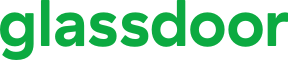

In [7]:
soup = BeautifulSoup(res.content,'lxml')
print(soup.prettify)

In [9]:
names = []
location = []
industry = []
description = []
views = []
salaries = []
jobs = []
notes = []
for i in range(1,11):
    url = 'https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=3.5&page={i}&locId=3941674&locType=C&locName=Rabat&filterType=RATING_OVERALL'
    resp = requests.get(url)
    so = BeautifulSoup(resp.content,'lxml')
    companies = soup.find_all(class_='mt-0 mb-std p-std css-mdw3bo css-errlgf')
    for comp in companies:
        name = comp.find('h2').text
        locate = comp.find('span',class_='d-block mt-0 css-56kyx5').text
        indus = comp.find('div',class_='col-lg-4 mt-sm mt-sm-std order-4').text
        descript = comp.find('p',class_='css-1sj9xzx css-56kyx5').text
        view = comp.find('h3',class_='mt-xsm mt-md-0').text
        salarie = comp.find('h3',class_="mt-xsm mt-md-0", attrs={'data-test':'cell-Salaries-count'}).text
        job = comp.find('h3', class_='mt-xsm mt-md-0', attrs={'data-test':'cell-Jobs-count'}).text
        note = comp.find('b').text
        names.append(name)
        description.append(descript)
        views.append(texte_sans_K(view))
        notes.append(note)
        industry.append(indus)
        salaries.append(texte_sans_K(salarie))
        jobs.append(texte_sans_K(job))
        location.append(locate)


In [8]:
import re
def texte_sans_K(element):
    corrige = re.sub(r'K$', '', element)
    return corrige

In [11]:
'''

companiess = soup.find_all('div',class_='row d-flex flex-wrap')
for com in companiess:
    #sal = com.find('h3',class_="mt-xsm mt-md-0", attrs={'data-test':'cell-Salaries-count'})
    nbrjob = com.find('h3', class_='mt-xsm mt-md-0', attrs={'data-test':'cell-Jobs-count'})
    print(nbrjob.text)

'''

'\n\ncompaniess = soup.find_all(\'div\',class_=\'row d-flex flex-wrap\')\nfor com in companiess:\n    #sal = com.find(\'h3\',class_="mt-xsm mt-md-0", attrs={\'data-test\':\'cell-Salaries-count\'})\n    nbrjob = com.find(\'h3\', class_=\'mt-xsm mt-md-0\', attrs={\'data-test\':\'cell-Jobs-count\'})\n    print(nbrjob.text)\n\n'

In [12]:
my_data =  {"names":names,"location":location,"salaries (k)":salaries,"jobs (k)":jobs,"views (k)":views,"evaluation":notes}
df = pd.DataFrame(my_data)
df.head()
df.to_csv('Projet1_scrapin')

,names,location,salaries (k),jobs (k),views (k),evaluation


In [13]:
indus = []
ccompanies = soup.find_all(class_='mt-0 mb-std p-std css-mdw3bo css-errlgf')
for comp in ccompanies:
    ind = comp.find('div',class_='d-flex flex-column align-items-center')
    print(ind.text)